# Diwali Sales Data

In [1]:
import pandas as pd 
import numpy  as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import warnings 
warnings.filterwarnings("ignore" , category=FutureWarning)

In [2]:
df = pd.read_csv('Diwali _Sales_Data.csv')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#check for null values
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

# Data Cleaning 

In [6]:
#drop unrelated/blank columns
df.drop(['Status' , 'unnamed1'], axis = 1, inplace =True)

In [7]:
# drop null values
df.dropna(inplace = True)

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

In [11]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["Marital_Status"]=df["Marital_Status"].apply(conv)        

# converted 0 and 1 values of Marital Status to yes/no to make it easier to understand

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  object
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,no,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,yes,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,yes,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,no,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,yes,Gujarat,Western,Food Processing,Auto,2,23877


In [14]:
df['User_ID'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11246     True
11247     True
11248     True
11249     True
11250     True
Name: User_ID, Length: 11239, dtype: bool

In [15]:
duplicates = df[df.duplicated()]
print(duplicates)

       User_ID   Cust_name Product_ID Gender Age Group  Age Marital_Status  \
19     1001883     Praneet  P00029842      M     51-55   54            yes   
4404   1004725     Jackson  P00150842      F     36-45   37            yes   
5703   1003208      Bowman  P00171642      F     26-35   31             no   
5908   1001260     Dheeraj  P00344042      M     26-35   28             no   
6173   1001325       Reese  P00111742      F     26-35   27            yes   
8651   1000083        Gute  P00242842      M     26-35   35             no   
8941   1001476     Anudeep  P00036842      M     18-25   25             no   
10571  1004404  Rittenbach  P00150142      F     26-35   28            yes   

               State      Zone    Occupation       Product_Category  Orders  \
19     Uttar Pradesh   Central   Hospitality                   Auto       1   
4404     Maharashtra   Western   Hospitality  Electronics & Gadgets       4   
5703           Bihar   Eastern   Agriculture  Electronics & 

In [16]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,yes,Uttar Pradesh,Central,Hospitality,Auto,1,23568
4404,1004725,Jackson,P00150842,F,36-45,37,yes,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859
5703,1003208,Bowman,P00171642,F,26-35,31,no,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088
5908,1001260,Dheeraj,P00344042,M,26-35,28,no,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015
6173,1001325,Reese,P00111742,F,26-35,27,yes,Gujarat,Western,Construction,Electronics & Gadgets,3,7923
8651,1000083,Gute,P00242842,M,26-35,35,no,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345
8941,1001476,Anudeep,P00036842,M,18-25,25,no,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202
10571,1004404,Rittenbach,P00150142,F,26-35,28,yes,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304


In [17]:
df = df.drop_duplicates()

print("After removing duplicates:", df.duplicated().sum())

After removing duplicates: 0


In [18]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,no,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,yes,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,yes,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,no,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,yes,Gujarat,Western,Food Processing,Auto,2,23877


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11231 non-null  int64 
 1   Cust_name         11231 non-null  object
 2   Product_ID        11231 non-null  object
 3   Gender            11231 non-null  object
 4   Age Group         11231 non-null  object
 5   Age               11231 non-null  int64 
 6   Marital_Status    11231 non-null  object
 7   State             11231 non-null  object
 8   Zone              11231 non-null  object
 9   Occupation        11231 non-null  object
 10  Product_Category  11231 non-null  object
 11  Orders            11231 non-null  int64 
 12  Amount            11231 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


In [19]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,2.489093,9454.084676
std,1.716055e+03,12.756116,1.114880,5221.728074
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [20]:
# use describe() for specific columns
df[['Age' , 'Orders' , 'Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084676
std,12.756116,1.114880,5221.728074
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# What is the total sales amount (revenue) generated during the Diwali period?

In [21]:
total = df['Amount'].sum()
print('The total sales amount (revenue) during the Diwali period is' , total)

The total sales amount (revenue) during the Diwali period is 106178825


# Gender 

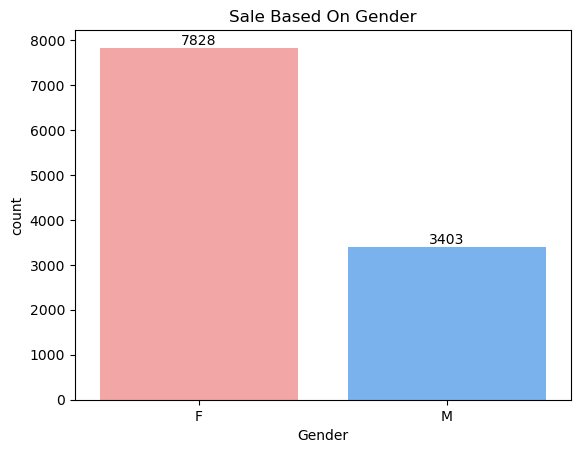

In [22]:
ax = sns.countplot(x = 'Gender',data = df , palette=['#FF9999', '#66B2FF'])

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Sale Based On Gender')
plt.show()

# The sales data shows that female customers made more purchases than male customers, indicating a stronger buying trend among women during the Diwali period

# plotting a bar chart for gender vs total amount

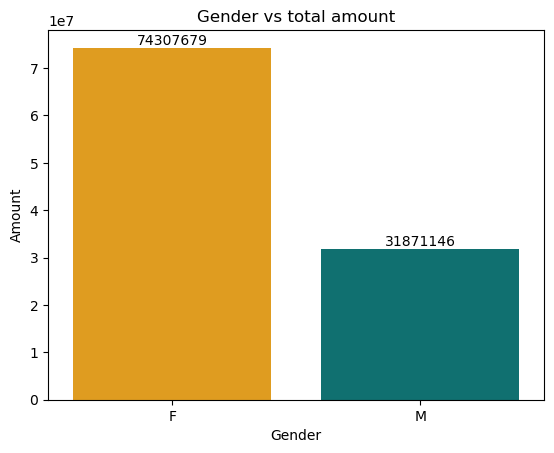

In [23]:
# Group sales by Gender
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Create barplot with custom colors
ax = sns.barplot(x ='Gender',y= 'Amount' ,data = sales_gen, palette=['orange', 'teal'])

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # no decimals
plt.title('Gender vs total amount')
plt.show()

# From the analysis, female customers spent more overall than male customers during the Diwali sales, highlighting women as the key contributors to total revenue

# Age

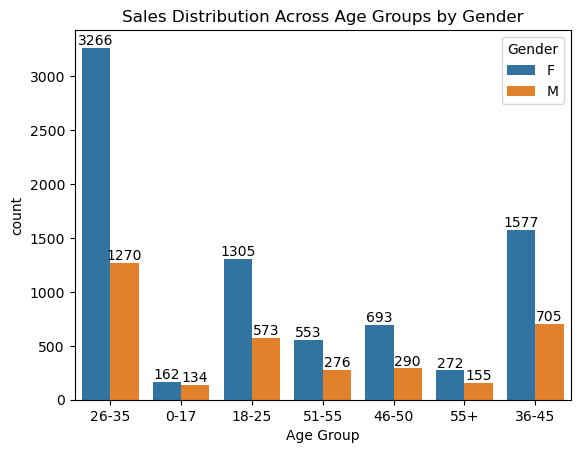

In [25]:
ax = sns.countplot(x = 'Age Group' , data =df , hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Sales Distribution Across Age Groups by Gender')
plt.show()

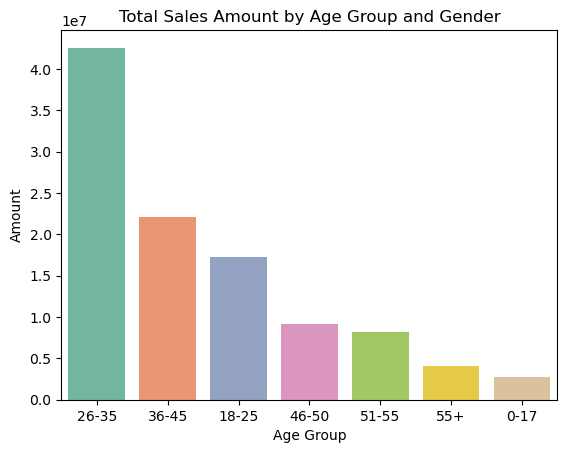

In [26]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,palette="Set2")
plt.title('Total Sales Amount by Age Group and Gender')
plt.show()

# From above graphs we can see that Most sales came from the 26–35 age group, with female customers leading in purchases compared to males across most age groups.

# State

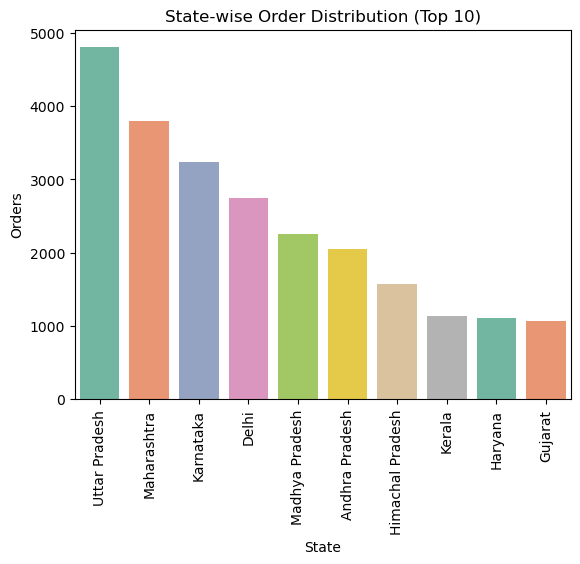

In [27]:
# total number of orders from top 10 states 

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.barplot(x = 'State',y= 'Orders' ,data = sales_state ,palette="Set2")
plt.title('State-wise Order Distribution (Top 10)')
plt.xticks(rotation = 90)
plt.show()

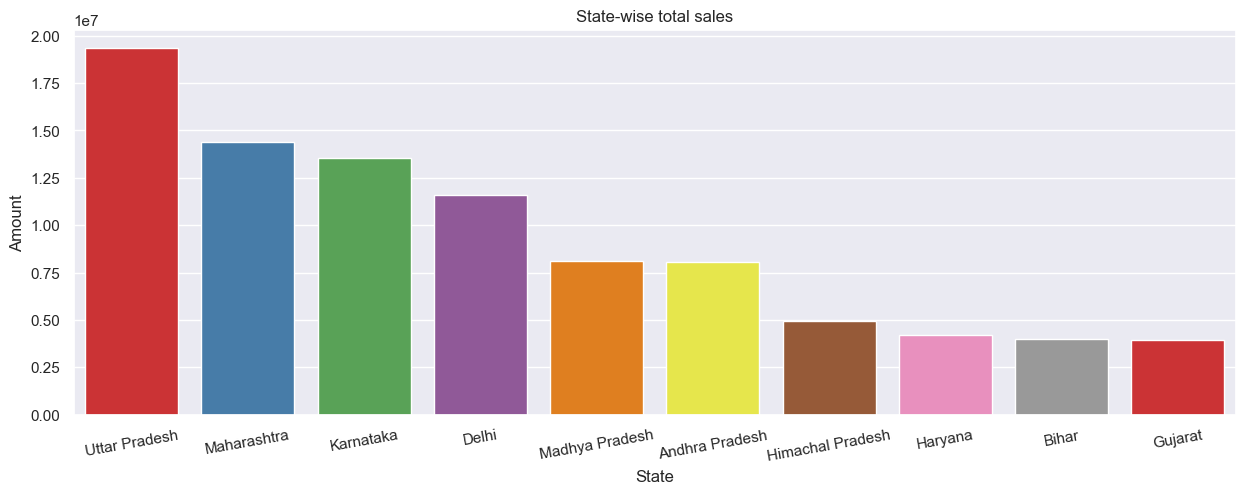

In [91]:
# total amount/sales from top 10 states 

sales_states = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.barplot(data = sales_states, x = 'State',y= 'Amount' , palette="Set1")
plt.xticks(rotation = 10)


plt.title('State-wise total sales')
plt.show()
          
                                                                                                                   

# From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# Marital Status

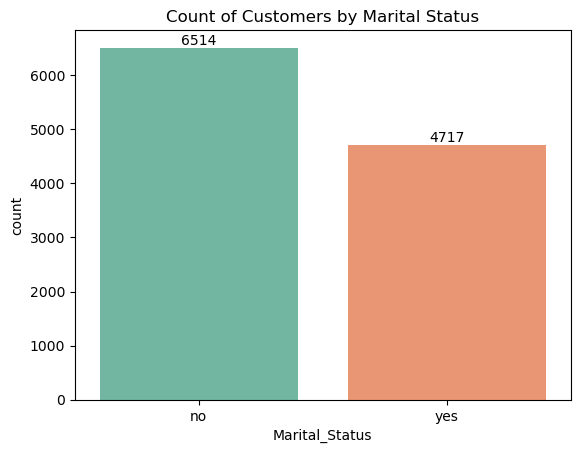

In [29]:
ax = sns.countplot(x= 'Marital_Status' , data = df , hue = 'Marital_Status' , palette="Set2")

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Customers by Marital Status')
plt.show()
    

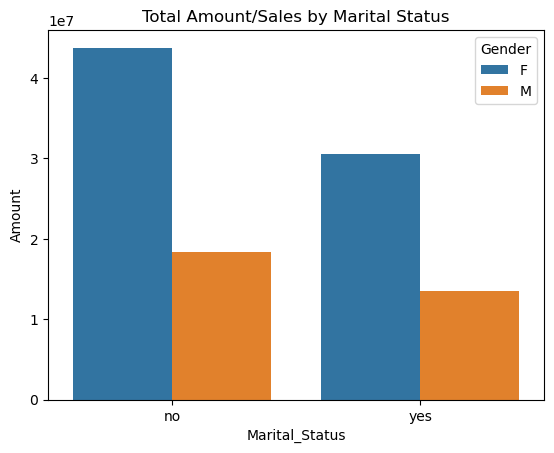

In [36]:
 # total amount/sales from Marital Status

sales_MaritalStatus = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_MaritalStatus, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.title('Total Amount/Sales by Marital Status')
plt.show()

# From above graphs we can see that most of the buyers are not  married (women) and they have high purchasing power

# Occupation

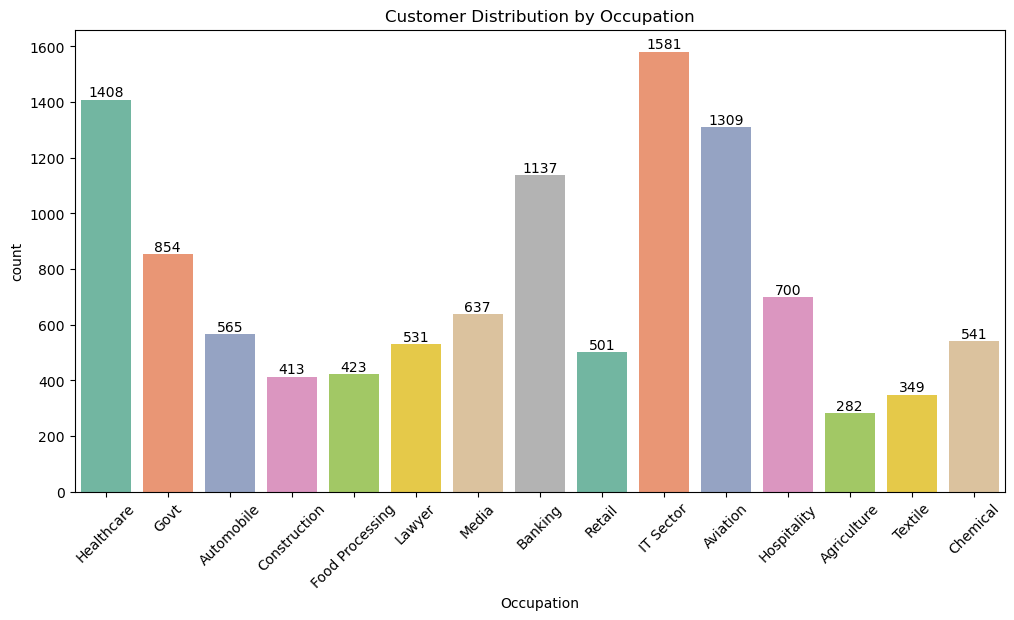

In [30]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='Occupation', palette="Set2")

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)   
plt.title("Customer Distribution by Occupation")
plt.show()

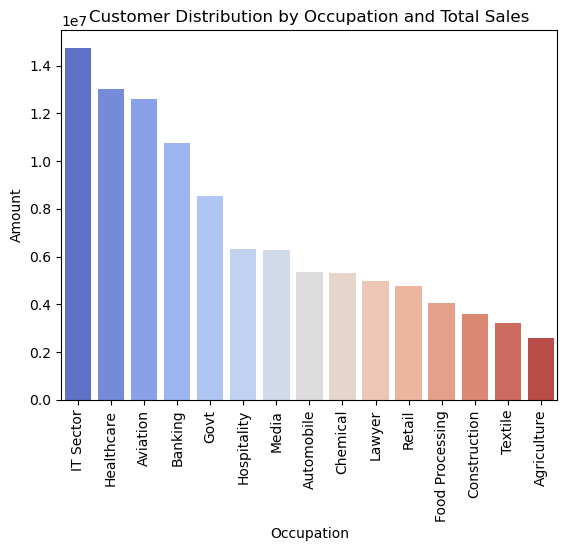

In [35]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_occupation, x = 'Occupation',y= 'Amount' ,palette="coolwarm" )
plt.xticks(rotation = 90)
plt.title('Customer Distribution by Occupation and Total Sales')
plt.show()

# rom above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

# Product Category

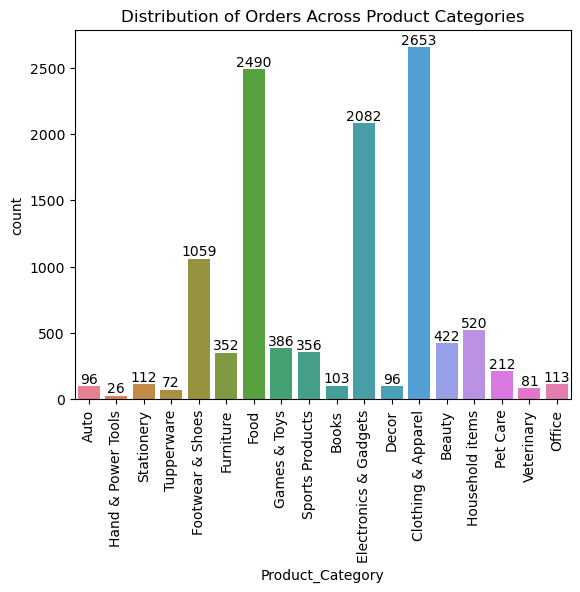

In [40]:
ax = sns.countplot(data = df, x = 'Product_Category' , palette="husl")
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Distribution of Orders Across Product Categories")
plt.show()


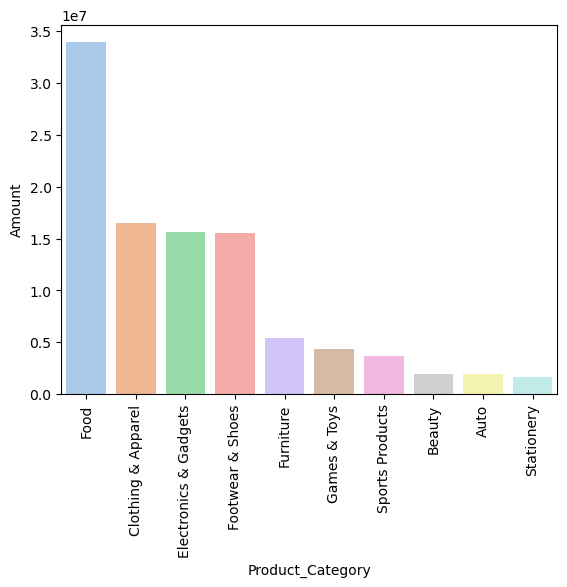

In [44]:
sales_ProductCategory = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data = sales_ProductCategory, x = 'Product_Category',y= 'Amount' ,palette="pastel" )
plt.xticks(rotation = 90)
plt.show()


# From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category